In [1]:
# load(sage.env.SAGE_STARTUP_FILE)
%display latex
from scipy import *
from matplotlib import rc
from colorama import *
rc('text', usetex=True)
import matplotlib.pyplot as plt
cmaps = [plt.get_cmap(c) for c in ['viridis', 'plasma', 'inferno', 'magma', 'cividis']]+[colormaps.YlGnBu]
mcolor = [colormaps.Set1(k)[:3] for k in range(9)]

# Scalar perturbation in black hole spacetimes

- Isolated BH $\to$ not really realistic
    - BH are surrounded by fields (scalar, fermions, electromagnetic, gravitational, ...) coming from neibouring matter or other compact objects.

- Perturbation $\to$ add fields to the BH spacetime

- Hypothesis: perturbations are small (no backreaction)

- The perturbation dynamics is given by the field equations
    - For spin 0,1/2 and 1 we can use the minimal coupling principle
    - For spin 2 we must use the gravitational field equations

## Schwarzschild space-time in rational-polynomial coordinates

We shall use the so called rational polynomial coordinates

In [2]:
var('M', domain='positive')
Scw.<t,r,θ,ϕ> = manifolds.Kerr(m=M,a=0)
chart = Scw.default_chart()
g = Scw.metric()

In [3]:
PR.<t,r,χ,ϕ> = Scw.chart(r't r:(0,oo) χ:[-1,1]:\chi ϕ:[-pi,pi]:periodic:\phi')
SC_to_PR = PR.transition_map(chart, [t,r,arccos(χ),ϕ])
Scw.set_default_chart(PR)
Scw.set_default_frame(PR.frame())
show(SC_to_PR.inverse().display(),10*' \t',g.display_comp())

t = t
r = r
χ = cos(θ)
ϕ = ϕ ' \t \t \t \t \t \t \t \t \t \t' g_tt = (2*M - r)/r 
g_rr = -r/(2*M - r) 
g_χχ = -r^2/(χ^2 - 1) 
g_ϕϕ = -r^2*χ^2 + r^2

## Scalar field and Klein-Gordon equation

When quantizing the energy-momentum relation of Special Relativity, we get

$$E^2 = p^2 + m^2 → Ê^2 = p̂^2 + m^2\mathbb{I},$$

where $Ê = iℏ ∂_t$ , $p̂ = −iℏ ∇$ and $\mathbb{I}$ is the identity operator. 

Applying
the identity to a scalar field $Φ$, we find the Klein–Gordon (KG) equation
in the Minkowski spacetime

$$(−∂_t^2 + ∇^2 − µ^2) Φ = (\Box{} − µ^2)Φ = 0,$$
with $µ = m/ℏ$.

The solutions of the Klein-Gordon equation are modes of frequency $ω$, orbital number $ℓ ∈ N$ and azimuthal $m ∈ Z$, with $−ℓ ≤ m ≤ ℓ$

$$Φ_{ωℓm}(t, r, χ, ϕ) = \exp(−iωt + imϕ) R_{ωℓ}(r)S_{ℓm}(χ)$$

Since the KG is linear, any linear combination of modes is also a solution

$$Φ(t, r, χ, ϕ) = \int_{-\infty}^\infty dω \sum_{\ell=0}^\infty \sum_{m=-\ell}^\ell a_{ℓmω}\exp(−iωt + imϕ) R_{ωℓ}(r) S_{ℓm}(χ)$$

where $a_{ℓmω}$ are arbitrary functions of $ω$ for any given pair $(ℓ, m)$. 

The functions $a_{ℓmω}$ can be determined from the initial conditions associated with the problem under investigation.

**Taking into account the axisymmetry and the stationarity of the metric, we intrduce the following ansatz:**

In [4]:
var('m μ λ', domain='positive') # μ = M / ħ, λ = sep_constant
var('ω')
R, S = function('R'),function('S')
Φ = Scw.scalar_field(exp(-i*ω*t+i*m*ϕ)*R(r)*S(χ),name='Φ',latex_name=r'\Phi')


**And we calculate the left hand side of the Klein-Gordon equation:**

In [5]:
dal_Φ = Φ.dalembertian()
KG = (dal_Φ/Φ -μ^2).expr()
KG

-((r^3*χ^2*R(r) - r^3*R(r))*ω^2*S(χ) - ((2*M*r^2 - r^3)*μ^2*R(r) - ((2*M*r^2 - r^3)*μ^2*R(r) + 2*(2*M^2 - 3*M*r + r^2)*diff(R(r), r) + (4*M^2*r - 4*M*r^2 + r^3)*diff(R(r), r, r))*χ^2 + (2*M*m^2 - m^2*r)*R(r) + 2*(2*M^2 - 3*M*r + r^2)*diff(R(r), r) + (4*M^2*r - 4*M*r^2 + r^3)*diff(R(r), r, r))*S(χ) + 2*((2*M - r)*χ^3*R(r) - (2*M - r)*χ*R(r))*diff(S(χ), χ) + ((2*M - r)*χ^4*R(r) - 2*(2*M - r)*χ^2*R(r) + (2*M - r)*R(r))*diff(S(χ), χ, χ))/(((2*M*r^2 - r^3)*χ^2*R(r) - (2*M*r^2 - r^3)*R(r))*S(χ))

In [6]:
Parallelism().set(nproc=12)

## Separating the equation

In [7]:
from de_tools import separate_pde

**We now separate $r$ and $\chi$ variables**

In [8]:
λ = var('λ')
KG1 = separate_pde(KG, (R(r),S(χ)), (r,χ), λ, show_log=False)

\(\large \color{green}{\text{Equations separated}}\)

\(\text{Parameters:} \left(M, r, λ, μ, ω\right) \)

\(\large \frac{2 \, {\left(M - r\right)} \frac{\partial\,R}{\partial r}}{{\left(2 \, M - r\right)} r} + \frac{{\left(2 \, M r^{2} μ^{2} - r^{3} μ^{2} + r^{3} ω^{2} + 2 \, M λ - r λ\right)} R\left(r\right)}{{\left(2 \, M - r\right)}^{2} r} + \frac{\partial^2\,R}{\partial r ^ 2} = 0 \)

\(\text{Parameters:} \left(m, λ, {\chi}\right) \)

\(\large \frac{2 \, {\chi} \frac{\partial\,S}{\partial {\chi}}}{{\left({\chi} + 1\right)} {\left({\chi} - 1\right)}} - \frac{{\left(λ {\chi}^{2} + m^{2} - λ\right)} S\left({\chi}\right)}{{\left({\chi} + 1\right)}^{2} {\left({\chi} - 1\right)}^{2}} + \frac{\partial^2\,S}{\partial {\chi} ^ 2} = 0 \)

Note that the second equation is the associated Legendre equation, with

$$Y_{\ell m}(\theta, \phi) = S_{\ell m}(\theta)e^{im\phi}$$

If we require that its solutions are non - singular at $\chi = -1$ and $\chi =   1$ (equivalently, at $\theta = 0$ and $\theta = \pi$), the separation constant must be $\lambda =  \ell(\ell + 1)$, where $\ell$ is an integer.

## Transformation of the radial equation to a Schroedinger-like equation

**First we do $\displaystyle R(r) = \frac{\psi(r)}{r}$**

In [9]:
ψ(r) = function('ψ', latex_name=r'\psi_{_{\omega \ell}}')(r)

In [10]:
from de_tools import change_function
from sage.manifolds.utilities import ExpressionNice as disp

In [11]:
ℓ = var('ℓ', domain='positive')
eq_ψ_0 = change_function(KG1[0], R(r), ψ(r), ψ(r)/r, r).subs({λ:ℓ*(ℓ+1)})
disp(eq_ψ_0)

-2*M*d(ψ)/dr/((2*M - r)*r) + (2*M*r^3*μ^2 - r^4*μ^2 + r^4*ω^2 + 2*M*r*(ℓ + 1)*ℓ - r^2*(ℓ + 1)*ℓ + 4*M^2 - 2*M*r)*ψ(r)/((2*M - r)^2*r^2) + d^2(ψ)/dr^2 == 0

**Introducing the tortoise coordinate $r_\star$, so that $\dfrac{dr_\star}{dr} = \dfrac{r^2}{(r^2 - 2 Mr)}$. Therefore $\dfrac{d\psi_{_{\omega \ell}}}{dr} = \dfrac{d\psi_{_{\omega \ell}}}{dr_\star}\dfrac{dr_\star}{dr}$ and $\dfrac{d^2 \psi_{_{\omega \ell}}}{dr^2} = \dfrac{d\psi_{_{\omega \ell}}}{dr_\star}\dfrac{d^2 r_\star}{dr^2} + \dfrac{d^2 \psi_{_{\omega \ell}}}{dr_\star^2}\left(\dfrac{dr_\star}{dr}\right)^2$.**

In [12]:
rtr = function('rt', latex_name=r'r_\star')(r)
drt = r^2/(r^2-2*M*r)
rt = var('rt', latex_name=r'r_\star', domain='real')

In [13]:
rt

rt

In [14]:
from de_tools import change_variable

In [15]:
eq_ψ  = change_variable(eq_ψ_0, ψ, r, rtr, rt, drt, expand=True)
disp(eq_ψ)

canonicalize_de for ψ(rt): passed!


(2*M*r^3*μ^2 - r^4*μ^2 + r^4*ω^2 + 2*M*r*ℓ^2 - r^2*ℓ^2 + 2*M*r*ℓ - r^2*ℓ + 4*M^2 - 2*M*r)*ψ(rt)/r^4 + d^2(ψ)/drt^2 == 0

**Comparing the expression above with $$\left(\omega^2-V\right)\psi+\psi''=0$$ we find the potential.**

In [16]:
from de_tools import get_de_coefficients
# get_de_coefficients(eq_ψ, ψ(rt), rt)

In [17]:
V(r) = ω^2-get_de_coefficients(eq_ψ, ψ(rt), rt)[0].expand()
show(LatexExpr(r'V_\ell(r) = '),V(r))

V_\ell(r) =  -2*M*μ^2/r + μ^2 - 2*M*ℓ^2/r^3 + ℓ^2/r^2 - 2*M*ℓ/r^3 + ℓ/r^2 - 4*M^2/r^4 + 2*M/r^3

## Bosonic field master equation

Separating the equations describing massless spin 1 and spin 2 perturbations in the Schwarzschild background is not as easy as separating the angular dependence for the scalar field. 

A remarkable result is that perturbations induced by any of these bosonic fields satisfy a single “master equation”,

$$\dfrac{d^2 \Psi^s_\ell}{d r_\star^2} + \left[\omega^2-V^s_\ell\right]\Psi^s_\ell= 0$$

where

$$V^s_\ell = \left(1-\frac{2M}{r}\right)\left(\frac{\ell(\ell+1)}{r^2}+\frac{2M(1-s^2)}{r^3}\right)$$

and $s = 0, 1, 2$ is the spin of the perturbing field.

## Plotting the potential

We can eliminate the explicit mass dependence with with $r\to \dfrac{r}{M}$ and $\mu \to \mu M$

In [18]:
V(r) = sum(map(factor,(V(r).subs({r:r*M}).subs({μ:μ/M})*M^2).expand().combine().operands()))
show(LatexExpr(r'V_l(r) = '),V(r))

V_l(r) =  μ^2 - 2*μ^2/r + (ℓ + 1)*ℓ/r^2 - 2*(ℓ^2 + ℓ - 1)/r^3 - 4/r^4

In [19]:
pot_BHPt = plot3d(V(r).subs({M:1,ℓ:1}),(r,2,30), (μ,0,.5),theme='dark',frame3d=False,
    color=(lambda x,y: float((.25-V(r=x,μ=y).subs({M:1, ℓ:1.1}))/.25), cmaps[1]), plot_points=100)
pot_BHPt.save('pot_BHPt.html')


%display plain
import IPython
from IPython.display import IFrame
url = './pot_BHPt.html'
# iframe = '<iframe src=' + url + ' width=980 height=650></iframe>'
IFrame(url,1282,700)

In [20]:
#%display latex

In [21]:
LV = [V(r).subs({ℓ:1,μ:k,M:1}) for k in srange(0,6/10,1/10)]

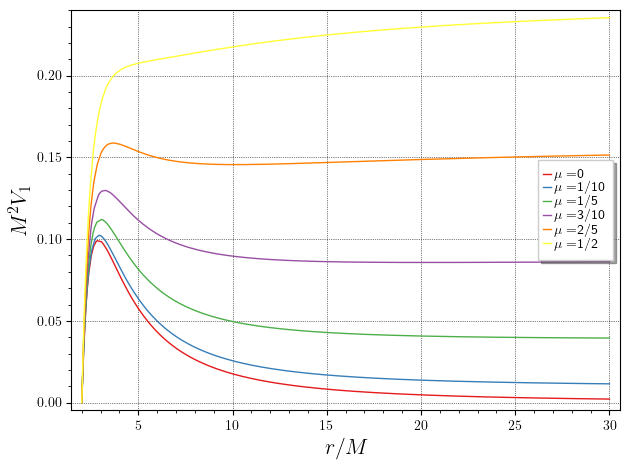

In [22]:
plot(LV,r,2,30, color=mcolor, gridlines=True, axes_labels=[r'${r}/{M}$','$M^2 V_1$'], frame=True, axes=False, legend_label=[r'$\mu = $' + str(QQ(k)) for k in srange(0,6/10,1/10)])

**In terms of tortoise coordinates $r_\star$ (by integrating and setting the constant $C = -2M\log(2M)$)**

In [23]:
tortoise = (integral(drt,r)-2*M*log(2*M)).simplify_log()
show(rt, '\t = \t', tortoise)

rt '\t = \t' M*log(1/4*(2*M - r)^2/M^2) + r

In [24]:
fast_tortoise = fast_callable(tortoise.subs({M:1}), vars=[r])

fast_V = fast_callable(V(r).subs({M:1, ℓ:1, μ:.1}), vars=[r])
fast_V0 = fast_callable(V(r).subs({M:1, ℓ:1, μ:0}), vars=[r])

import numpy as np

r1 = np.arange(2+10**-5, 2+10**-3,10**-5)
r2 = np.arange(2+2*10**-3, 2+1*10**-1,10**-3)
r3 = np.arange(2+2*10**-1,50, 10**-1)

rr = np.concatenate((r1,r2,r3))
# display(rr.max(),rr.min())

tt = fast_tortoise(rr)
# display(tt.max(),tt.min())

vr = fast_V(rr)
# display(vr.max(),vr.min())

vr2 = fast_V(tt)

plot_points = list(zip(tt,vr))

In [25]:
rrtt = list(zip(tt,rr))

In [26]:
#r_to_tort = list_plot(list(zip(rr,tt)), plotjoined=True, gridlines=True,axes_labels=[r'$r/M$','r*/M'], frame=True, axes=False)

In [27]:
#tort_to_r = list_plot(rrtt, plotjoined=True, gridlines=True,axes_labels=[r'${r_\star}/{M}$','$r/M$'], frame=True, axes=False)

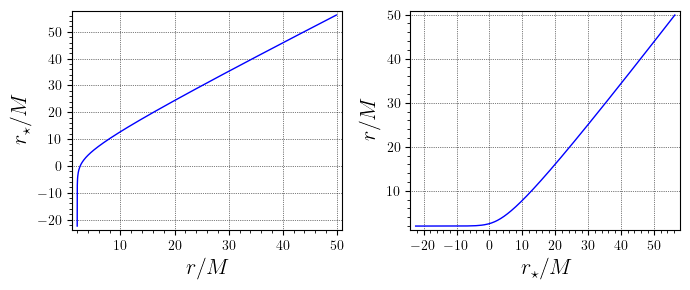

In [28]:
r_to_tort = list_plot(list(zip(rr,tt)), plotjoined=True, gridlines=True,axes_labels=[r'${r}/{M}$',r'$r_\star/M$'], frame=True, axes=False)
tort_to_r = list_plot(rrtt, plotjoined=True, gridlines=True,axes_labels=[r'${r_\star}/{M}$','$r/M$'], frame=True, axes=False)
graphics_array([r_to_tort, tort_to_r]).show(figsize=[7,3])

**Plot parameters $(\ell=1, \mu=.1)$**

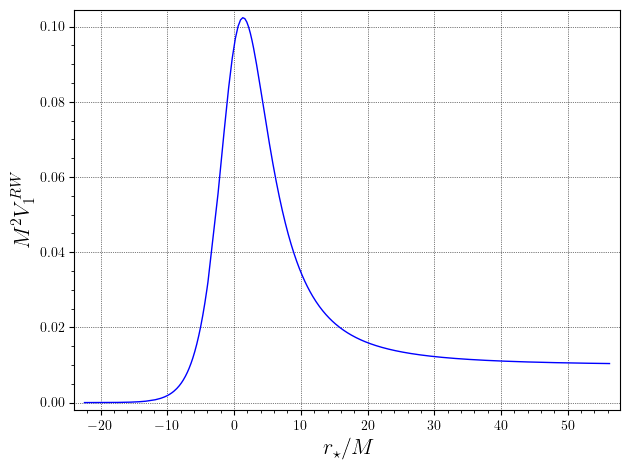

In [29]:
plot_potential = list_plot(plot_points, plotjoined=True, gridlines=True,axes_labels=[r'${r_\star}/{M}$','$M^2 V_1^{RW}$'], frame=True, axes=False)
plot_potential

## Asymptotic solutions

**Near the event horizon (r=2M)**

In [30]:
show(rt,LatexExpr(r'\xrightarrow{r \to 2M}'),limit(tortoise,r=2*M, dir='+'))

rt \xrightarrow{r \to 2M} -Infinity

In [31]:
show(LatexExpr(r'V(r)\xrightarrow{r \to 2M}'),limit(V(r),r=2, dir='+'))

V(r)\xrightarrow{r \to 2M} 0

In [32]:
eq_ψ_H = limit(eq_ψ,r=2*M, dir='+')(r=rt)
show(dal_Φ, LatexExpr(r'-\mu^2\Phi=0 \xrightarrow{r \to 2M}'), eq_ψ_H)

Scalar field Box(Φ) on the 4-dimensional Lorentzian manifold M -\mu^2\Phi=0 \xrightarrow{r \to 2M} ω^2*ψ(rt) + diff(ψ(rt), rt, rt) == 0

In [33]:
assume(ω>0)
ψ_H0 = desolve(eq_ψ_H,ψ(rt), ivar=rt).maxima_methods().exponentialize().expand()
# ψ_H0

In [34]:
k1,k2 = ψ_H0.variables()[:2]

In [35]:
var('A_1', latex_name=r'A_\text{in}')
var('A_2', latex_name=r'A_\text{out}')
aux1 = solve(A_2 == -1/2*I*k1+1/2*k2, k1, solution_dict=True)
aux2 = solve(A_1 == 1/2*I*k1+1/2*k2, k2, solution_dict=True)

Solution near horizon

In [36]:
w0 = SR.wild(0) #wilds card
s1 = sum(ψ_H0.find(w0*exp(i*rt*ω))).subs(aux1).expand()
s2 = sum(ψ_H0.find(w0*exp(-i*rt*ω))).subs(aux2).expand()
ψ_H = s1+s2
show(ψ(rt), LatexExpr(r'\xrightarrow{r \to 2M}'), ψ_H)

ψ(rt) \xrightarrow{r \to 2M} A_2*e^(I*rt*ω) + A_1*e^(-I*rt*ω)

- $A_{in}$ represents the amplitude of a wave that enters the black hole 
- $A_{out}$ represents the amplitude of a wave that exits the black hole.

**Far away from the black hole, i.e. when $r → ∞$**

In [37]:
show(rt,LatexExpr(r'\xrightarrow{r \to \infty}'),limit(tortoise,r=oo))

rt \xrightarrow{r \to \infty} +Infinity

In [38]:
show(LatexExpr(r'V(r)\xrightarrow{r \to \infty}'),limit(V(r),r=oo))

V(r)\xrightarrow{r \to \infty} μ^2

In [39]:
from de_tools import canonicalize_de

In [40]:
eq_ψ_oo = limit(eq_ψ,r=oo)(r=rt)
show(dal_Φ,LatexExpr(r'-\mu^2\Phi=0 \xrightarrow{r \to \infty}'), canonicalize_de(eq_ψ_oo, ψ(rt),rt, show_log=False))

Scalar field Box(Φ) on the 4-dimensional Lorentzian manifold M -\mu^2\Phi=0 \xrightarrow{r \to \infty} -(μ + ω)*(μ - ω)*ψ(rt) + diff(ψ(rt), rt, rt) == 0

In [41]:
assume(ω-μ>0)
ψ_oo0 = desolve(eq_ψ_oo,ψ(rt), ivar=rt).maxima_methods().exponentialize().expand()
# ψ_oo0

Asymptotic solution

In [42]:
var('B_1', latex_name=r'B_\text{in}')
var('B_2', latex_name=r'B_\text{out}')
s1 = sum(ψ_oo0.find(w0*exp(i*rt*sqrt(ω^2-μ^2)))).subs(aux1).expand()
s2 = sum(ψ_oo0.find(w0*exp(-i*rt*sqrt(ω^2-μ^2)))).subs(aux2).expand()
ψ_oo = (s1+s2).subs({A_1:B_1, A_2:B_2})
show(ψ(rt),LatexExpr(r'\xrightarrow{r \to \infty}'), ψ_oo)

ψ(rt) \xrightarrow{r \to \infty} B_2*e^(I*sqrt(-μ^2 + ω^2)*rt) + B_1*e^(-I*sqrt(-μ^2 + ω^2)*rt)

- If $ω > µ:$
    - $B_\text{in}$ represents the amplitude of an incoming wave at infinity;
    - $B_\text{out}$ represents the amplitude of an outgoing wave at infinity.
- If $ω < µ:$
    - $B_\text{in}$ represents an exponential growing mode at infinity;
    - $B_\text{out}$ represents an exponential decaying mode at infinity.

## Plot asymptotic solutions

In [43]:
f1(x,y) = .005*sin(3*x)+y
y1, y2 = .06,.08
xAmin, xAmax = -20,-12
arrow_waveA1 = plot(f1(x,y1),xAmin,xAmax, color='red')+arrow((xAmin,f1(xAmin,y1)),(xAmin-2,f1(xAmin,y1)), color='red',arrowsize=1.5, width=1.5)
arrow_waveA2 = plot(f1(x,y2),xAmin,xAmax, color='red')+arrow((xAmax,f1(xAmax,y2)),(xAmax+2,f1(xAmax,y2)), color='red',arrowsize=1.5, width=1.5)
tA1 = text(r'$A_\mathrm{in}e^{-i\omega r_\star}$',((xAmax-xAmin)/2+xAmin,y1-.01), color='black')
tA2 = text(r'$A_\mathrm{out}e^{+i\omega r_\star}$',((xAmax-xAmin)/2+xAmin,y2+.01), color='black')
wA1 = arrow_waveA1 + tA1
wA2 = arrow_waveA2 + tA2
arrow_waveA = wA1 + wA2#arrow_waveA1 + arrow_waveA2 + tA1 + tA2

In [44]:
xBmin, xBmax = 40,48
arrow_waveB1 = plot(f1(x,y1),xBmin,xBmax, color='red')+arrow((xBmin,f1(xBmin,y1)),(xBmin-2,f1(xBmin,y1)), color='red',arrowsize=1.5, width=1.5)
arrow_waveB2 = plot(f1(x,y2),xBmin,xBmax, color='red')+arrow((xBmax,f1(xBmax,y2)),(xBmax+2,f1(xBmax,y2)), color='red',arrowsize=1.5, width=1.5)
tB1 = text(r'$B_\mathrm{in}e^{-i\omega r_\star}$',((xBmax-xBmin)/2+xBmin,y1-.01), color='black')
tB2 = text(r'$B_\mathrm{out}e^{+i\omega r_\star}$',((xBmax-xBmin)/2+xBmin,y2+.01), color='black')
wB1 = arrow_waveB1 + tB1
wB2 = arrow_waveB2 + tB2
arrow_waveB = wB1 + wB2
#arrow_waveB = arrow_waveB1 + arrow_waveB2 + tB1 + tB2

In [45]:
plot_arrow = plot_potential+arrow_waveA+arrow_waveB

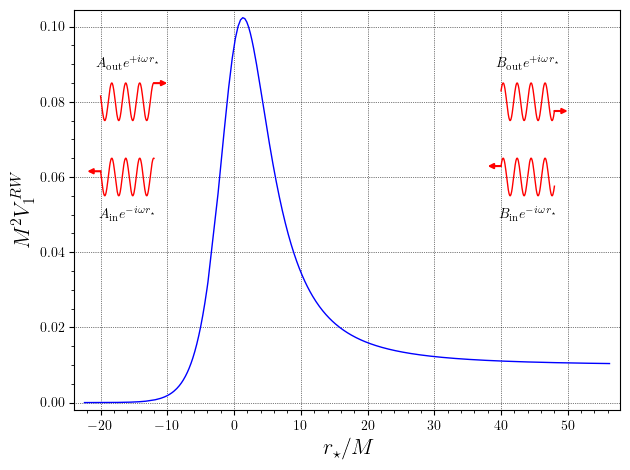

In [46]:
plot_arrow

## Boundary conditions

We want to study three types of problem: scattering, quasinormal modes, and quasibound states.

Recalling
$$ψ_{ωℓ} (r_\star) \to \left\{\begin{align}
&A_\text{in} \exp (−i ω r_\star ) + A_\text{out} \exp (+i ω r_\star ) ,& r_\star → −∞, \quad (r\to 2M)\\
 &B_\text{in} \exp{\left(-i \, \sqrt{-μ^{2} + ω^{2}} {r_\star}\right)} + B_{\text{out}} \exp{\left(i \, \sqrt{-μ^{2} + ω^{2}} {r_\star}\right)} ,& r_\star → +∞, \quad (r\to \infty)
\end{align}\right.$$

- **At the event horizon:** classically, nothing can escape the black hole $\Longrightarrow A_\text{out}=0$

In [47]:
ψ_H = ψ_H.subs({A_2:0})
show(ψ(rt),LatexExpr(r'\xrightarrow{r \to 2M}'),ψ_H)

ψ(rt) \xrightarrow{r \to 2M} A_1*e^(-I*rt*ω)

- **Scattering:** a frequency $ω ∈ \mathbb{R}$, with $ω > µ$, is given. We choose the amplitude $B_1$ of the incoming wave from infinity and determine the amplitudes $A_1$ and $B_2$.

- **Quasinormal modes (QNMs) and quasibound states (QBSs):** we
impose a boundary condition at infinity $\to$ only outgoing waves
(QNM) or only exponentially decaying solution (QBS). Due to the
extra boundary condition, the frequency $ω ∈ \mathbb{C}$ is unknown.

### Scattering modes

We can understand black hole scattering by making an analogy with 1-D problems from QM. Assuming that $ω ∈ \mathbb{R}$, with $ω > µ$, we have

$$ψ_{ωℓ} (r_\star) \xrightarrow{r_\star \to \pm\infty} \left\{\begin{align}
&A_\text{in} \exp (−i ω r_\star )  ,& r_\star \xrightarrow{r \to 2M} −∞\\
 &B_{\text{in}} \exp{\left(-i \, \sqrt{-μ^{2} + ω^{2}} {r_\star}\right)} + B_{\text{out}} \exp{\left(i \, \sqrt{-μ^{2} + ω^{2}} {r_\star}\right)} ,& r_\star \xrightarrow{r \to \infty} +∞
\end{align}\right.$$

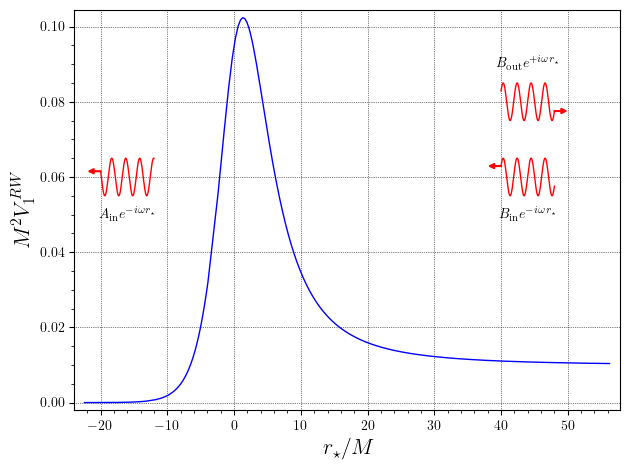

In [48]:
p_scattering = plot_potential + wA1 + wB1 + wB2
p_scattering

Note that if $ψ_{ωℓ}$ , with $ω ∈ \mathbb{R}$, is a solution of the differential equation

$$ψ_{ωℓ}'' + [ω − V(r)] ψ_{ωℓ} = 0,$$

then $ψ_{ωℓ}^*$ is also a solution of the same equation. 

### Wronskian

The second-order ordinary differential equation

$$Ψ''+ p(x)Ψ'+ q(x)Ψ = 0$$

in general, admits two linearly independent solutions $Ψ_1$, $Ψ_2$ . 

The Wronskian $W$ has the property

$$W' = pW,$$

which gives

$$W(\Psi_1,\Psi_2,x) = W(\Psi_1,\Psi_2,x_0)\exp\left(-\int_{x_0}^2p(x)dx\right).$$

We then see that the Wronskian is constant whenever $p(x) = 0$, as in the case of the
master equation.

Therefore,

$$W (ψ_{ωℓ}, ψ_{ωℓ}^*) = \text{constant}$$

Equating the wronskian at the horizon and at infinity
$$W|_{r \to 2M} = W|_{r \to \infty}$$

In [49]:
assume(A_1,A_2,B_1,B_2,'complex')

W_oo = wronskian(ψ_oo, conjugate(ψ_oo),rt).canonicalize_radical()
W_H = wronskian(ψ_H, conjugate(ψ_H),rt).canonicalize_radical()
show(W_H, '\t = \t' ,W_oo.full_simplify())

2*I*A_1*ω*conjugate(A_1) '\t = \t' -2*(-I*B_1*conjugate(B_1) + I*B_2*conjugate(B_2))*sqrt(μ + ω)*sqrt(-μ + ω)

In [50]:
eq_W =W_H/((B_1)*conjugate(B_1)) ==W_oo/((B_1)*conjugate(B_1))

In [51]:
eq_W.expand()

2*I*A_1*ω*conjugate(A_1)/(B_1*conjugate(B_1)) == 2*I*sqrt(μ + ω)*sqrt(-μ + ω) - 2*I*B_2*sqrt(μ + ω)*sqrt(-μ + ω)*conjugate(B_2)/(B_1*conjugate(B_1))

In [52]:
R_ω = (B_2/B_1)*conjugate(B_2/B_1)

Since $B_\text{in}$ is the amplitude of the incoming wave, 

$$R_ω =\left|\frac{B_\text{out}}{B_\text{in}}\right|^2$$

and by

$$R_\omega + T_\omega = 1$$

we find

$$T_ω = \frac{ω}{\sqrt{\omega^2-\mu^2}}\left|\frac{A_\text{in}}{B_\text{in}}\right|^2$$

### QNM

Normal modes are the characteristic modes of oscillation of a system
(as in the cases of a mass-spring system and a string with fixed ends).
- Due to the boundary conditions, normal modes do not exist for black holes. 
- For black holes, the characteristic oscillations are always associated with dissipation, originating QNMs. 
- The QNMs are the natural modes of relaxation of a black hole. 
- They are characterized by the absence incoming waves from infinity.

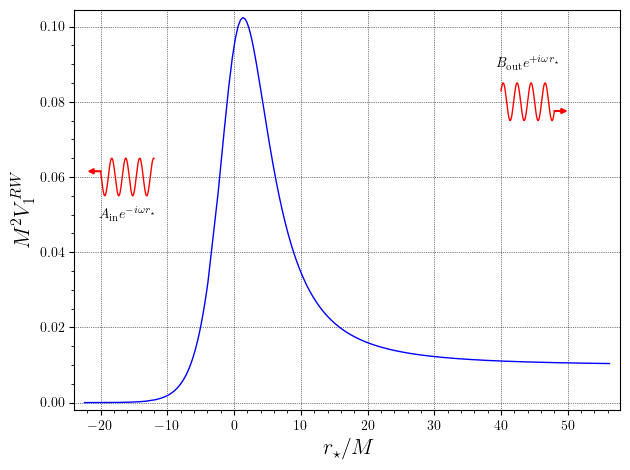

In [53]:
p_qnm = plot_potential + wA1 + wB2
p_qnm

In [68]:
#(p_qnm).save('plot_V_RW.png', figsize=[7,5])
(p_qnm).save('plot_V_RW.png', figsize=[14,6])

Taking $ω = ω_R + iω_I$ and $k = \sqrt{\omega^2-\mu^2}=  k_R + ik_I$, assumim $ω_R > 0$ and $k_R > 0$ (without loss of generality), at $r → ∞$ we have:

$$ϕ_{ωℓm} ∝ \exp(−iωt + ik r) = \exp\left[−i ω_R \left(t − \frac{k_R}{ω_R}r\right)\right]\exp (ω_I t) \exp(−k_I r)$$

- QNMs are characterized by $ω_I < 0$, leading to energy dissipation. If $ω_I > 0$, the corresponding mode is an unstable mode.

### QNM frequency

In terms of the complex frequency $ω$, $ω_R$ is related to the period $T$ (or frequency) of the oscillation and $ω_I$ gives the characteristic timescale $τ$ as

$$ω = ω_R + iω_I = 2\pi f-\frac i \tau$$

It allows to identify the BH parameters from the observational data (ringdown phase of GW, for exemple).

#### Schwarzschild

The first gravitational quasinormal mode frequency of a Schwarzschild black hole corresponds to the $ℓ = 2$ mode and is given, in geometrical units ($c=G=1$), by

$$M ω = 0.37367 − 0.08896i$$

That is 

$$f = \frac{0.037367}{M} \qquad \text{and} \qquad  \tau = \frac{M}{0.08896}.$$

Converting to Hertz,

$$f = \frac{0.037367}{M}\times \frac{c^3}{2\pi GM_\odot}\frac{M_\odot}{M} \qquad \text{and} \qquad  \tau = \frac{M}{0.08896} \times \left(\frac{c^3}{2\pi GM_\odot}\frac{M_\odot}{M}\right)^{-1}.$$

#### Kerr

gravitational quasinormal mode frequencies of the Kerr black hole:

$$\omega \approx \frac{1}{3\sqrt{3M}}\left[\left(\ell+\frac12\right)+\frac{2am}{3\sqrt{3M}} -i\left(n+\frac12\right) \right]$$

**There are still a lot of space for alternative theories!**

In [100]:
# ff = 0.37367
# taut = 1/0.08896
# from scipy.constants import speed_of_light, gravitational_constant
# solar_mass = 1.9884099e30
# (speed_of_light^3/(gravitational_constant*solar_mass)/(2*pi)).n()^-1 * taut

## Stability

Physics BH stability

- perturbations that do not perturb $M$ or $J$, to these vacuum solutions will be:
    - radiated away 
    - asymptotically decay to leave the final metric in the same family of solutions.

- Mode stability, assumes that the metric is stable if the linear perturbation, $h_{µν}$, is able to be written as a super position of harmonic modes (Regge-Wheeler). 
    - **Closed for Schwarzschild and Kerr family**

- Linear stability, assumes that the metric is stable if the linear perturbations, $h_{µν}$ is bounded in any timescale and decay asymptotically (Kay-Wald). 
    - **Closed for Schwarzschild**

- Non-linear stability, the most general, makes no assumptions on the form of the perturbation and is still currently an open problem.
    - **Closed only for the Minkowski metric**

### QBSs

Unlike QNMs, the QBSs are localized in space (far away from the black
hole, they decay exponentially). The QBSs remain localized inside the
potential well generated by the mass of the field:

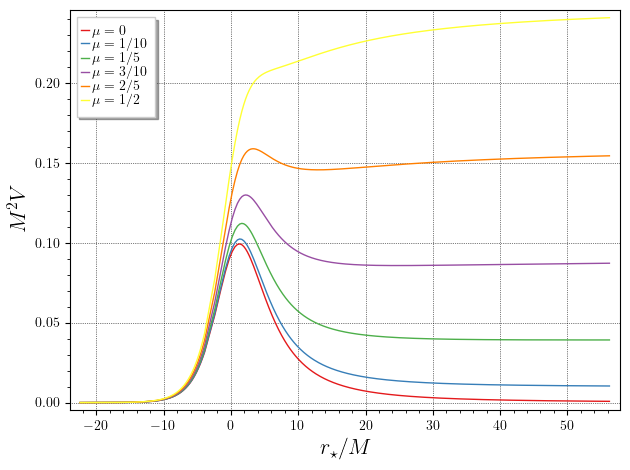

In [101]:
list_fast_V = [fast_callable(V(r).subs({M:1, ℓ:1, μ:k}), vars=[r]) for k in srange(0,.6,.1)]
list_plot_points = [list(zip(tt,vk(rr))) for vk in list_fast_V]
pts = [list_plot(k, plotjoined=True, gridlines=True,axes_labels=[r'${r_\star}/{M}$',r'$M^2V$'], 
                 frame=True, axes=False, color=mcolor[q], 
                 legend_label=r'$\mu = ' + str(QQ(q/10))+'$') for q,k in enumerate(list_plot_points)]
sum(pts)

**$(\ell=1, \mu=.4)$**

In [102]:
fast_V2 = fast_callable(V(r).subs({M:1, ℓ:1, μ:.4}), vars=[r])

vr2 = fast_V2(rr)
# display(vr2.max(),vr2.min())

plot_points2 = list(zip(tt,vr2))

plot_potential2 = list_plot(plot_points2, plotjoined=True, gridlines=True,axes_labels=[r'${r_\star}/{M}$','$M^2 V_1$'], frame=True, axes=False)

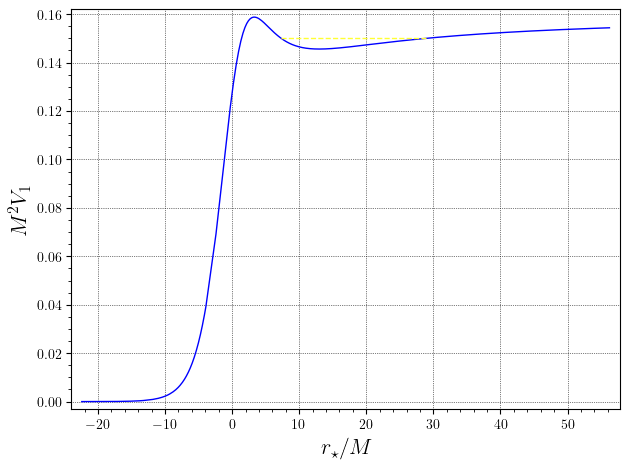

In [103]:
r1 = find_root(V(r).subs({M:1, ℓ:1, μ:.4})-.15, 0,10)
r2 = find_root(V(r).subs({M:1, ℓ:1, μ:.4})-.15, 20,30)
# display(r1,r2)

level = line(((fast_tortoise(r1), fast_V2(r1)),(fast_tortoise(r2), fast_V2(r2))), linestyle='--', color=mcolor[5])

plot_potential2+level

As in the case of QNMs, due to the boundary conditions the frequency of the QBSs are complex numbers.

$$ϕ_{ωℓm} ∝ \exp(−iωt + ik r_\star) = \exp\left[−i ω_R \left(t − \frac{k_R}{ω_R}r\right)\right]\exp (ω_I t) \exp(−k_I r)$$

QBSs have $ω_I < 0$. If $ω_I > 0$, the corresponding mode is unstable.

## Numerical solution of the radial equation

In [104]:
Rp(r) = function("Rp", latex_name=r"R'")(r)

In [105]:
KG1[0].subs({λ:ℓ*(ℓ+1)})

2*(M - r)*diff(R(r), r)/((2*M - r)*r) + (2*M*r^2*μ^2 - r^3*μ^2 + r^3*ω^2 + 2*M*(ℓ + 1)*ℓ - r*(ℓ + 1)*ℓ)*R(r)/((2*M - r)^2*r) + diff(R(r), r, r) == 0

$\mu=0, \ell=1$ and $\omega = \omega_R = \dfrac{\log 3}{8\pi}$

In [106]:
pl = []
for k in range(1,5):
    KGn = [diff(R(r),r)-Rp(r)==0, KG1[0].subs({diff(R(r),r):Rp(r), diff(R(r),r,2):diff(Rp(r),r)})]
    KGn[1] = KGn[1].subs(M=1,μ=0, ω=(log(3)/(8*pi)), λ=k*(k+1))
    KGn2 = [0,0]
    KGn2[0] = solve(KGn[0],diff(R(r),r))[0].right()
    KGn2[1] = solve(KGn[1],diff(Rp,r))[0].right()
    var('x,y')
    KGn2[0] = KGn2[0].subs({Rp(r):y})
    KGn2[1] = KGn2[1].subs({Rp(r):y, R(r):x})
    radsol = desolve_system_rk4(KGn2, [x,y], ics =[3.2 ,1 ,0.5], ivar=r, end_points=1000, step=1)
    rm = np.linspace(3.2,60,len(radsol))
    pl.append(list_plot(list(zip(rm,[ j  for i ,j,k  in radsol ])), axes_labels =['$r/M$' , '$R$'], color='red', 
              legend_label = r'$\ell='+str(k)+'$', gridlines=True, frame=True, axes=False, plotjoined=True))

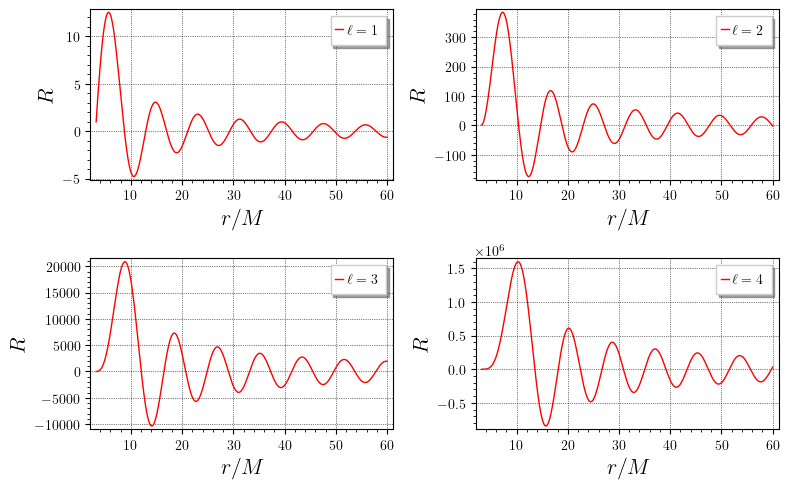

In [107]:
ga = graphics_array(pl, nrows=2)
ga.show(figsize=[8,5])